In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(15598248)

data = pd.read_csv('musicData.csv')
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [311]:
data[data['artist_name'] == 'Playboi Carti']

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
25034,30875.0,Playboi Carti,Long Time - Intro,66.0,0.28400,0.472,211773.0,0.860,0.000000,E,0.8300,-3.967,Minor,0.0451,144.07299999999998,4-Apr,0.366,Rap
25060,78006.0,Playboi Carti,Choppa Won't Miss (feat. Young Thug),65.0,0.01820,0.858,217960.0,0.661,0.000000,C,0.1150,-6.544,Major,0.3190,163.056,4-Apr,0.611,Rap
25210,40912.0,Playboi Carti,Home (KOD),61.0,0.31900,0.722,-1.0,0.686,0.000000,G,0.3520,-6.178,Minor,0.2400,77.015,4-Apr,0.435,Rap
25228,40158.0,Playboi Carti,New Choppa,67.0,0.17400,0.772,-1.0,0.605,0.000000,C,0.3290,-4.223,Minor,0.0579,128.162,4-Apr,0.425,Rap
25249,44187.0,Playboi Carti,Lean 4 Real (feat. Skepta),65.0,0.03030,0.754,177027.0,0.777,0.000000,G,0.3620,-5.077,Major,0.0665,75.98,4-Apr,0.159,Rap
25321,45805.0,Playboi Carti,Ain't Doin That,55.0,0.11200,0.765,172500.0,0.540,0.000000,C#,0.1220,-6.726,Major,0.0890,106.021,4-Apr,0.223,Rap
25388,84004.0,Playboi Carti,FlatBed Freestyle,72.0,0.09670,0.755,193973.0,0.552,0.000000,A,0.1580,-5.604,Major,0.2880,153.157,4-Apr,0.402,Rap
25997,57599.0,Playboi Carti,R.I.P.,69.0,0.01190,0.725,192027.0,0.723,0.000000,G#,0.0860,-6.067,Minor,0.1600,140.003,4-Apr,0.509,Rap
26045,63663.0,Playboi Carti,wokeuplikethis*,76.0,0.01380,0.785,235535.0,0.620,0.000000,G#,0.1500,-6.668,Major,0.2540,78.476,4-Apr,0.478,Rap
27432,83037.0,Playboi Carti,Right Now (feat. Pi'erre Bourne),63.0,0.13900,0.687,207013.0,0.604,0.000000,F#,0.2030,-5.005,Minor,0.0663,78.487,4-Apr,0.308,Rap


In [312]:
data.shape

(50005, 18)

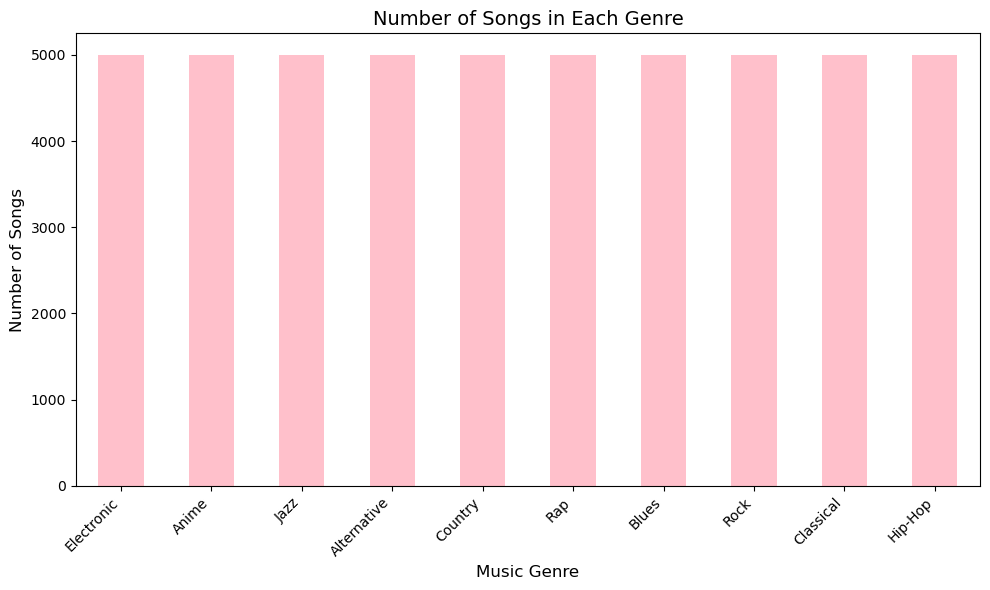

In [313]:
# Visualise number of songs per genre
genre_counts = data['music_genre'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='pink')
plt.xlabel('Music Genre', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Number of Songs in Each Genre', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

# Data Preprocessing

## Handle Missing Values

In [314]:
# Check for missing values
missing_values = data.isnull().sum()

print(missing_values)

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


In [315]:
# Drop rows with missing values
data = data.dropna(axis=0)
data.shape

(50000, 18)

The column "tempo" contains missing values marked as "?".

In [316]:
data[data['tempo'] == '?']

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
35,27048.0,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,4-Apr,0.2390,Electronic
36,55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,63058.0,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
49964,53387.0,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
49967,76585.0,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop
49976,79654.0,Big Sean,Sunday Morning Jetpack,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,4-Apr,0.5890,Hip-Hop


In [317]:
# Replace '?' with NaN in the 'tempo' column
data['tempo'] = data['tempo'].replace('?', np.nan)

In [318]:
# Impute missing values in 'tempo' column based on artist_name and track_name
for index, row in data[data['tempo'].isna()].iterrows():
    artist_name = row['artist_name']
    track_name = row['track_name']
    
    # Find another row with the same artist_name and track_name and get the tempo value
    matching_rows = data[(data['artist_name'] == artist_name) & (data['track_name'] == track_name) & data['tempo'].notna()]
    
    # If a matching row is found, impute the tempo value
    if not matching_rows.empty:
        imputed_tempo = matching_rows['tempo'].iloc[0]
        data.at[index, 'tempo'] = imputed_tempo

In [319]:
data['tempo'].isna().sum()

4338

In [320]:
# Calculate the median tempo for each music genre
median_tempo_by_genre = data.groupby('music_genre')['tempo'].median()

# Impute the missing 'tempo' values with the median of their respective 'music_genre'
for index, row in data[data['tempo'].isna()].iterrows():
    genre = row['music_genre']
    if genre in median_tempo_by_genre:
        imputed_tempo = median_tempo_by_genre[genre]
        data.at[index, 'tempo'] = imputed_tempo

In [321]:
data['tempo'].isna().sum()

0

The "duration_ms" column contains some rows with a value of -1.0, which doesn't make sense.

In [322]:
data[data['duration_ms'] == -1]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.7590,Electronic
13,62039.0,DJ Shadow,Broken Levee Blues,31.0,0.86000,0.737,-1.0,0.405,0.036100,A,0.1730,-10.536,Minor,0.0424,154.745,4-Apr,0.6470,Electronic
16,83926.0,San Holo,One Thing,59.0,0.13600,0.336,-1.0,0.746,0.000000,C#,0.7370,-4.315,Minor,0.0685,151.756,4-Apr,0.2100,Electronic
24,40033.0,The Prodigy,Diesel Power,56.0,0.06800,0.725,-1.0,0.877,0.000036,C,0.0900,-3.496,Major,0.0646,105.919,4-Apr,0.0977,Electronic
35,27048.0,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,125.983,4-Apr,0.2390,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,37037.0,empty_field,What You Like (feat. Ty Dolla $ign & Wiz Khalifa),52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,4-Apr,0.8570,Hip-Hop
49969,61010.0,Bone Thugs-N-Harmony,No Surrender,47.0,0.01270,0.706,-1.0,0.787,0.000000,A,0.2650,-5.314,Major,0.0888,85.963,4-Apr,0.2430,Hip-Hop
49979,29598.0,Young Dolph,Thinking Out Loud,47.0,0.48300,0.789,-1.0,0.452,0.000000,B,0.0892,-7.538,Minor,0.4800,140.101,4-Apr,0.2840,Hip-Hop
49981,90232.0,Mac Miller,Party On Fifth Ave.,60.0,0.06350,0.594,-1.0,0.823,0.000000,A,0.0950,-5.210,Major,0.3320,97.101,4-Apr,0.6630,Hip-Hop


In [323]:
# Replace -1.0 with NaN in the 'duration_ms' column
data['duration_ms'] = data['duration_ms'].replace(-1, np.nan)

In [324]:
# Impute missing values in 'duration_ms' column based on artist_name and track_name
for index, row in data[data['duration_ms'].isna()].iterrows():
    artist_name = row['artist_name']
    track_name = row['track_name']
    
    # Find another row with the same artist_name and track_name and get the duration
    matching_rows = data[(data['artist_name'] == artist_name) & (data['track_name'] == track_name) & data['duration_ms'].notna()]
    
    # If a matching row is found, impute the duration
    if not matching_rows.empty:
        imputed_duration = matching_rows['duration_ms'].iloc[0]
        data.at[index, 'duration_ms'] = imputed_duration
        
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,NaN,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [325]:
data['duration_ms'].isna().sum()

4277

In [326]:
# Calculate the median duration for each music genre
median_duration_by_genre = data.groupby('music_genre')['duration_ms'].median()

# Impute the missing 'duration_ms' values with the median of their associated 'music_genre'
for index, row in data[data['duration_ms'].isna()].iterrows():
    genre = row['music_genre']
    if genre in median_duration_by_genre:
        imputed_duration = median_duration_by_genre[genre]
        data.at[index, 'duration_ms'] = imputed_duration

In [327]:
data['duration_ms'].isna().sum()

0

## Handle Categorical Variables

In [328]:
data['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [329]:
# Map the key values to numeric values
key_mapping = {
    'A': 1, 'A#': 2, 'B': 3, 'C': 4, 'C#': 5, 'D': 6, 'D#': 7, 
    'E': 8, 'F': 9, 'F#': 10, 'G': 11, 'G#': 12
}

# Clean 'key' values
data['key'] = data['key'].str.strip().map(key_mapping)

data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245251.0,0.941,0.79200,2,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,6,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,12,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,5,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,10,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [330]:
# Create the 'is_major' dummy variable
data['is_major'] = data['mode'].map({'Major': 1, 'Minor': 0})

data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,is_major
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245251.0,0.941,0.79200,2,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,6,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic,0
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,12,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,1
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,5,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,1
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,10,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,1


In [331]:
data['music_genre'].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [332]:
# Map the genre values to numeric values
genre_mapping = {
    'Electronic': 1, 'Anime': 2, 'Jazz': 3, 'Alternative': 4, 'Country': 5, 'Rap': 6, 'Blues': 7, 
    'Rock': 8, 'Classical': 9, 'Hip-Hop': 10
}

# Clean 'music_genre' values
data['music_genre'] = data['music_genre'].str.strip().map(genre_mapping)

data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,is_major
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245251.0,0.941,0.79200,2,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,1,0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,6,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,1,0
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,12,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,1,1
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,5,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,1,1
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,10,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,1,1


## Drop Columns

In [333]:
# Drop unnecessary columns
data = data.drop(columns=['artist_name', 'track_name', 'instance_id', 'obtained_date', 'mode'])

data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,is_major
0,27.0,0.00468,0.652,245251.0,0.941,0.79200,2,0.115,-5.201,0.0748,100.889,0.759,1,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,6,0.124,-7.043,0.0300,115.00200000000001,0.531,1,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,12,0.534,-4.617,0.0345,127.994,0.333,1,1
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,5,0.157,-4.498,0.2390,128.014,0.270,1,1
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,10,0.157,-6.266,0.0413,145.036,0.323,1,1


# Split Data

In [334]:
def split_by_genre(data):
    train_list = []
    test_list = []

    genres = data['music_genre'].unique()

    for genre in genres:
        genre_data = data[data['music_genre'] == genre]
        
        # Randomly pick 500 songs for the test set
        test_data = genre_data.sample(n=500, random_state=15598248)
        
        # The remaining songs go to the train set
        train_data = genre_data.drop(test_data.index)

        train_list.append(train_data)
        test_list.append(test_data)
    
    music_train = pd.concat(train_list)
    music_test = pd.concat(test_list)
    
    return music_train, music_test

train_data, test_data = split_by_genre(data)

print("Training Set Shape:", train_data.shape)
print("Test Set Shape:", test_data.shape)

Training Set Shape: (45000, 14)
Test Set Shape: (5000, 14)


# Normalise Data

In [353]:
from sklearn.preprocessing import StandardScaler

# List of columns to normalise
columns_to_normalise = [
    'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

scaler = StandardScaler()

# Create X_train and X_test (exclude target column 'music_genre')
X_train = train_data.drop(columns=['music_genre'])
X_test = test_data.drop(columns=['music_genre'])

X_train_std = X_train.copy()
X_test_std = X_test.copy()

# Fit and transform the training data and test data
X_train_std[columns_to_normalise] = scaler.fit_transform(X_train_std[columns_to_normalise])
X_test_std[columns_to_normalise] = scaler.transform(X_test_std[columns_to_normalise])

# Create y_train and y_test
y_train = train_data['music_genre']
y_test = test_data['music_genre']

# Dimensionality Reduction

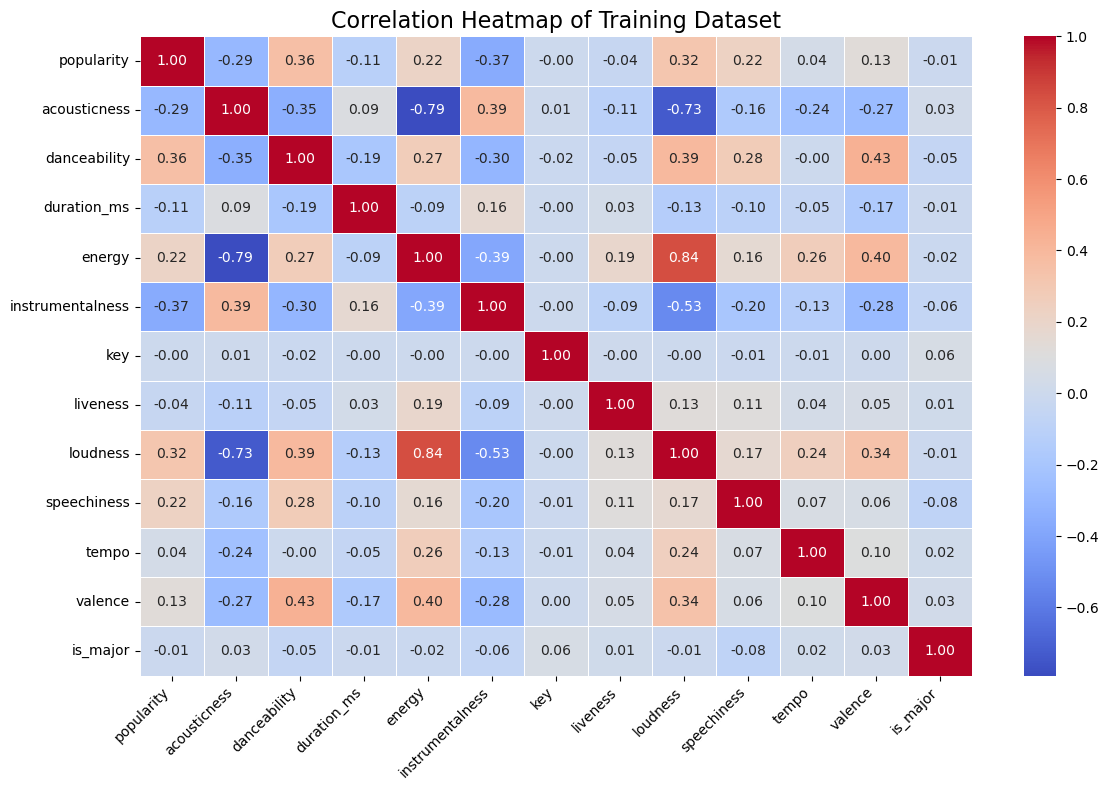

In [337]:
import seaborn as sns

# Calculate the correlation matrix for the training dataset
correlation_matrix = X_train_std.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Training Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## PCA 

In [355]:
from sklearn.decomposition import PCA

X_train_std_pca = X_train_std[columns_to_normalise]

# Apply PCA with 3 components
pca = PCA(n_components=3) 
X_train_pca = pca.fit_transform(X_train_std_pca)

# Calculate the explained variance ratio for each component
pca_explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio for each PCA Component:")
for i, var in enumerate(pca_explained_variance):
    print(f"Component {i + 1}: {var:.4f}")

# Calculate the total explained variance for the first 3 components
total_pca_explained_variance = np.sum(pca_explained_variance[:3])

print()
print(f"Total Explained Variance for the first 3 components: {total_pca_explained_variance:.4f}")

Explained Variance Ratio for each PCA Component:
Component 1: 0.3381
Component 2: 0.1224
Component 3: 0.0958

Total Explained Variance for the first 3 components: 0.5563


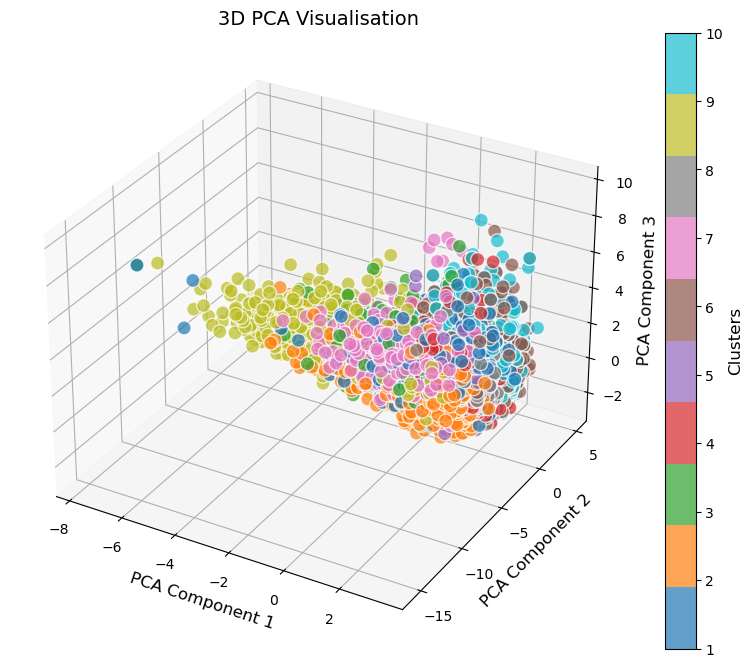

In [356]:
# Visualise the PCA result in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the first three PCA components 
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=music_train['music_genre'], cmap='tab10', s=100, alpha=0.7, edgecolors='w')

ax.set_xlabel("PCA Component 1", fontsize=12)
ax.set_ylabel("PCA Component 2", fontsize=12)
ax.set_zlabel("PCA Component 3", fontsize=12)
ax.set_title("3D PCA Visualisation", fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters', fontsize=12)  
plt.show()

## LDA

In [357]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA 
lda = LinearDiscriminantAnalysis(n_components=3)  
X_train_lda = lda.fit_transform(X_train_std, y_train)

# Calculate the explained variance ratio for each component
lda_explained_variance = lda.explained_variance_ratio_

print("Explained Variance Ratio for each LDA Component:")
for i, var in enumerate(lda_explained_variance):
    print(f"Component {i + 1}: {var:.4f}")
    
# Calculate the total explained variance for the first 3 components
total_lda_explained_variance = np.sum(lda_explained_variance[:3])

print()
print(f"Total Explained Variance for the first 3 components: {total_explained_variance:.4f}")

Explained Variance Ratio for each LDA Component:
Component 1: 0.6423
Component 2: 0.1713
Component 3: 0.1116

Total Explained Variance for the first 3 components: 0.9252


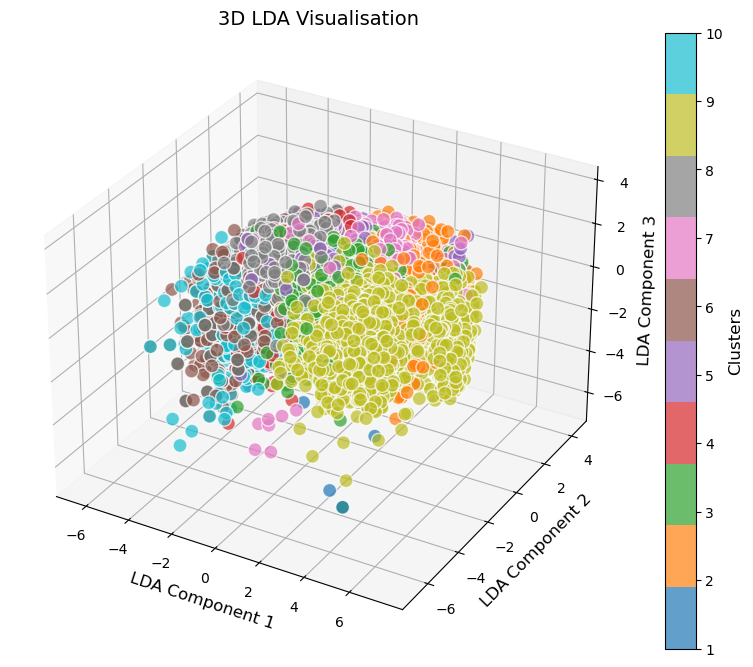

In [358]:
# Visualise the LDA result in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the first three LDA components 
scatter = ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], c=y_train, cmap='tab10', s=100, alpha=0.7, edgecolors='w')

ax.set_xlabel("LDA Component 1", fontsize=12)
ax.set_ylabel("LDA Component 2", fontsize=12)
ax.set_zlabel("LDA Component 3", fontsize=12)
ax.set_title("3D LDA Visualisation", fontsize=14) 
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters', fontsize=12)  
plt.show()

# Clustering

In [385]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)

X_train_lda_clusters = kmeans.fit_predict(X_train_lda)

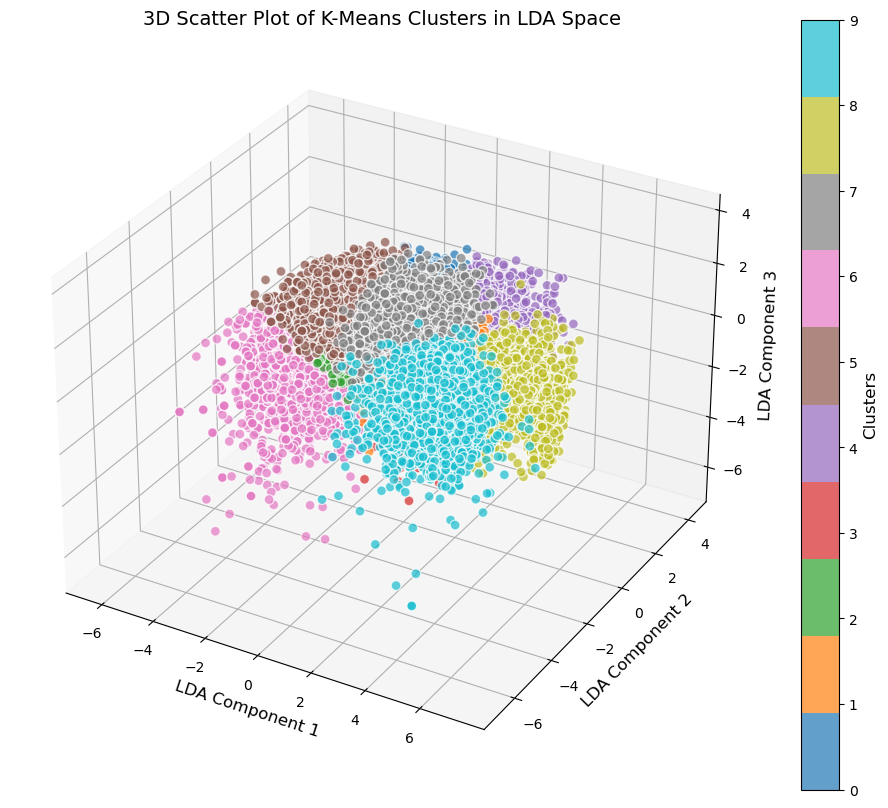

In [386]:
# Create a 3D scatter plot to visualise the clusters in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], c=X_train_lda_clusters, cmap='tab10', s=50, alpha=0.7, edgecolors='w')

ax.set_xlabel("LDA Component 1", fontsize=12)
ax.set_ylabel("LDA Component 2", fontsize=12)
ax.set_zlabel("LDA Component 3", fontsize=12)
ax.set_title("3D Scatter Plot of K-Means Clusters in LDA Space", fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters', fontsize=12)
plt.show()

# Classification Models

## SVM

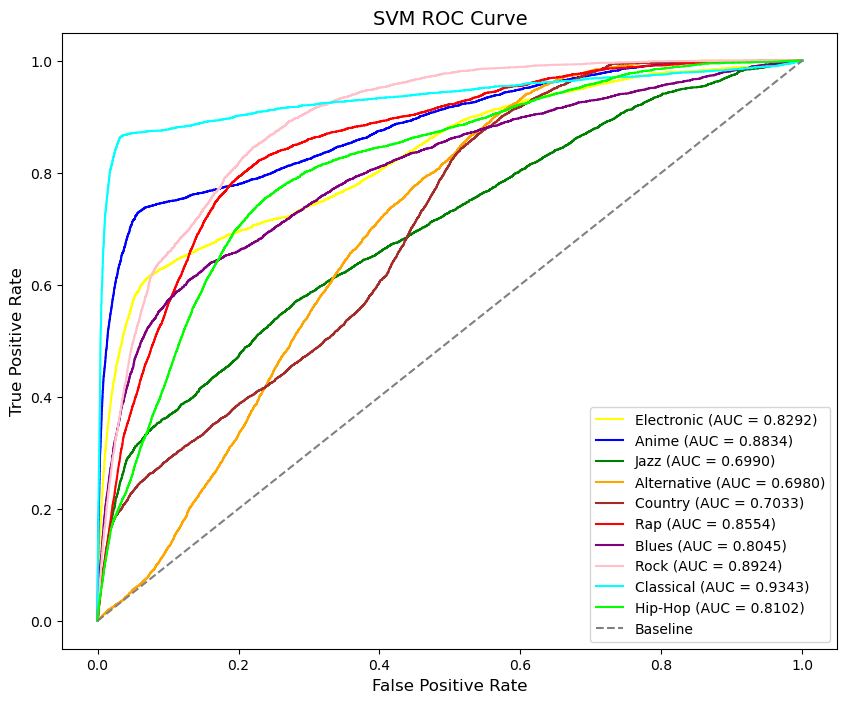

Average AUC Score for SVM: 0.8110


In [359]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Map colours to each genre
colours = {
    'Electronic': 'yellow', 'Anime': 'blue', 'Jazz': 'green', 'Alternative': 'orange', 'Country': 'brown',
    'Rap': 'red', 'Blues': 'purple', 'Rock': 'pink', 'Classical': 'cyan', 'Hip-Hop': 'lime'
}

# Store AUC scores
auc_scores = []

# Train SVM model
svc_model = SVC(probability=True, random_state=42)  
ovr_svc = OneVsRestClassifier(svc_model)

# Fit model on LDA-transformed data
ovr_svc.fit(X_train_lda, y_train)

# Predict probabilities for each genre
y_prob = ovr_svc.predict_proba(X_train_lda)

plt.figure(figsize=(10, 8))

# Iterate through each genre and plot its ROC curve
for genre, colour in colours.items():
    class_id = genre_mapping[genre] 
    auc_score = roc_auc_score(y_train == class_id, y_prob[:, class_id - 1])  
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train == class_id, y_prob[:, class_id - 1])  
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

# Diagonal line representing a random classifier (baseline)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('SVM ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.show()

# Calculate average AUC score 
average_auc_svc = sum(auc_scores) / len(auc_scores)
print(f"Average AUC Score for SVM: {average_auc_svc:.4f}")

## AdaBoost

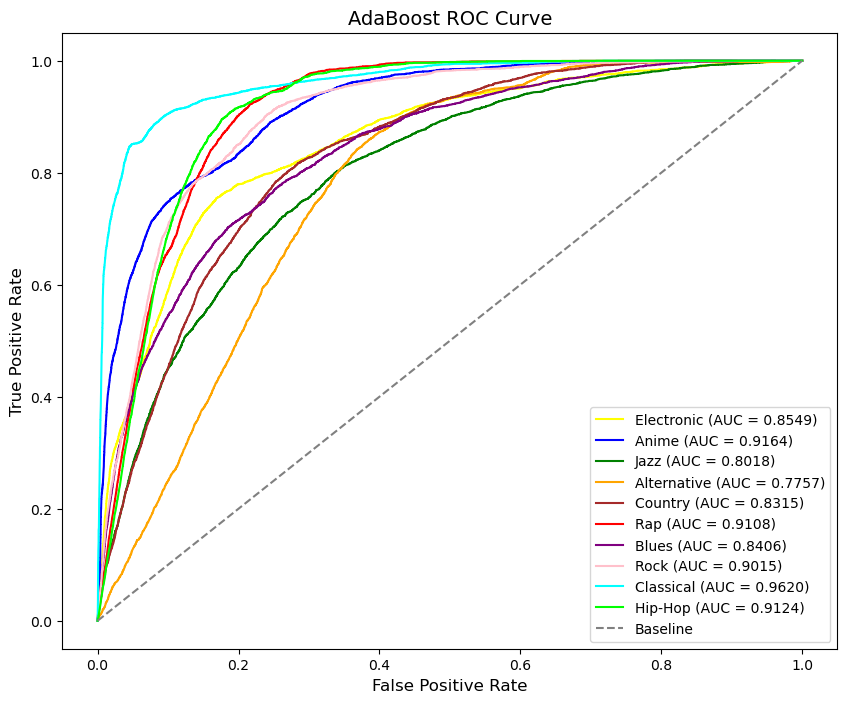

Average AUC Score for AdaBoost: 0.8708


In [361]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialise AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)  
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
ovr_adaboost = OneVsRestClassifier(adaboost_model)

# Fit the AdaBoost model
ovr_adaboost.fit(X_train_lda, y_train)

y_prob = ovr_adaboost.predict_proba(X_train_lda)

plt.figure(figsize=(10, 8))

auc_scores = []

for genre, colour in colours.items():
    class_id = genre_mapping[genre]  
    auc_score = roc_auc_score(y_train == class_id, y_prob[:, class_id - 1]) 
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train == class_id, y_prob[:, class_id - 1]) 
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('AdaBoost ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.show()

average_auc_adaboost = sum(auc_scores) / len(auc_scores)
print(f"Average AUC Score for AdaBoost: {average_auc_adaboost:.4f}")

## XGBoost

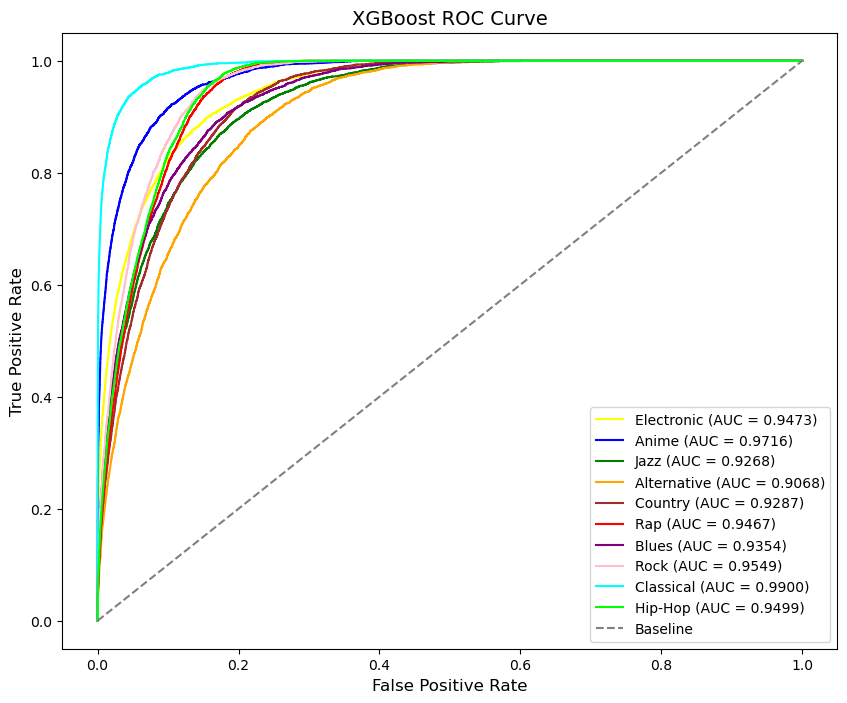

Average AUC Score for XGBoost: 0.9458


In [362]:
import xgboost as xgb

# Initialise XGBoost model
xgboost_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
ovr_xgb = OneVsRestClassifier(xgboost_model)

# Fit the XGBoost model on LDA-transformed data
ovr_xgb.fit(X_train_lda, y_train)

y_prob = ovr_xgb.predict_proba(X_train_lda)

plt.figure(figsize=(10, 8))

auc_scores = []

for genre, colour in colours.items():
    class_id = genre_mapping[genre] 
    auc_score = roc_auc_score(y_train == class_id, y_prob[:, class_id - 1])  
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train == class_id, y_prob[:, class_id - 1])  
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XGBoost ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.show()

average_auc_xgb = sum(auc_scores) / len(auc_scores)
print(f"Average AUC Score for XGBoost: {average_auc_xgb:.4f}")

## Feedforward Neural Networks

Epoch [10/100], Loss: 2.2833
Epoch [20/100], Loss: 2.2371
Epoch [30/100], Loss: 2.1944
Epoch [40/100], Loss: 2.1549
Epoch [50/100], Loss: 2.1197
Epoch [60/100], Loss: 2.0859
Epoch [70/100], Loss: 2.0582
Epoch [80/100], Loss: 2.0402
Epoch [90/100], Loss: 2.0269
Epoch [100/100], Loss: 2.0172


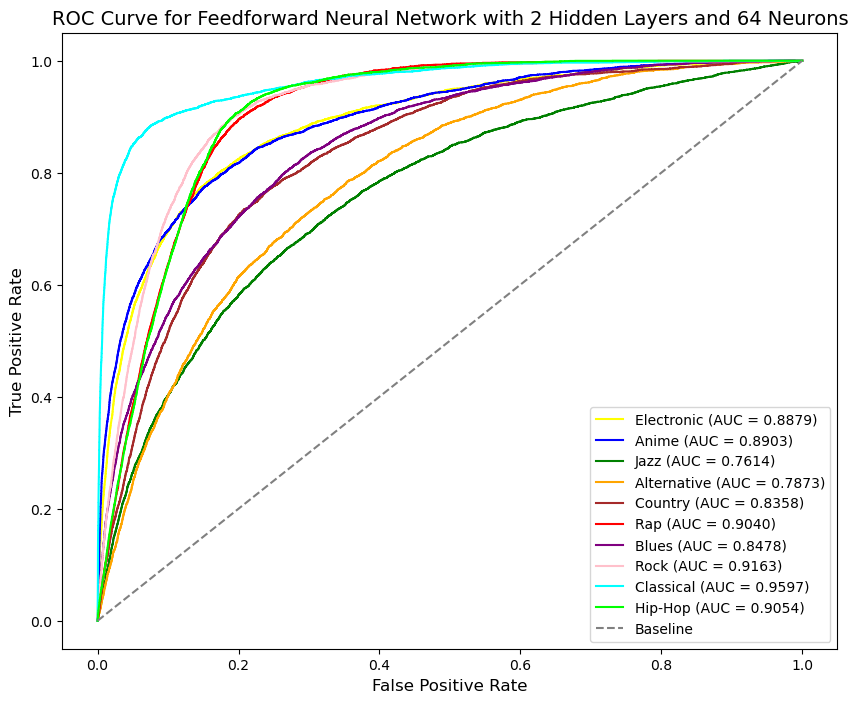

Average AUC Score for FFNN with 2 Hidden Layers and 64 Neurons: 0.8696


In [369]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelBinarizer

# Define the Feedforward Neural Network (FFNN) class with 2 hidden layers
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Parameters
input_dim = X_train_lda.shape[1]  # Number of LDA components
hidden_dim = 64  # Number of units in each hidden layer
output_dim = 10  # Number of genres

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_lda, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)  

# Instantiate the model, loss function, and optimiser
model = FFNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100  
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Get predicted probabilities
model.eval()
with torch.no_grad():
    y_prob = model(X_train_tensor).numpy()

# Calculate AUC and plot ROC curves for each genre
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)

plt.figure(figsize=(10, 8))

auc_scores = []
for genre, colour in colours.items():
    class_id = genre_mapping[genre]  
    auc_score = roc_auc_score(y_train_bin[:, class_id-1], y_prob[:, class_id-1])  
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train_bin[:, class_id-1], y_prob[:, class_id-1])  
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

# Diagonal line representing a random classifier (baseline)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Feedforward Neural Network with 2 Hidden Layers and 64 Neurons', fontsize=14)
plt.legend(loc='lower right')
plt.show()

# Calculate average AUC score
average_auc_nn_2_layers_64 = np.mean(auc_scores)
print(f"Average AUC Score for FFNN with 2 Hidden Layers and 64 Neurons: {average_auc_nn_2_layers_64:.4f}")

Epoch [10/100], Loss: 2.2331
Epoch [20/100], Loss: 2.1472
Epoch [30/100], Loss: 2.0897
Epoch [40/100], Loss: 2.0554
Epoch [50/100], Loss: 2.0281
Epoch [60/100], Loss: 2.0117
Epoch [70/100], Loss: 2.0006
Epoch [80/100], Loss: 1.9921
Epoch [90/100], Loss: 1.9848
Epoch [100/100], Loss: 1.9785


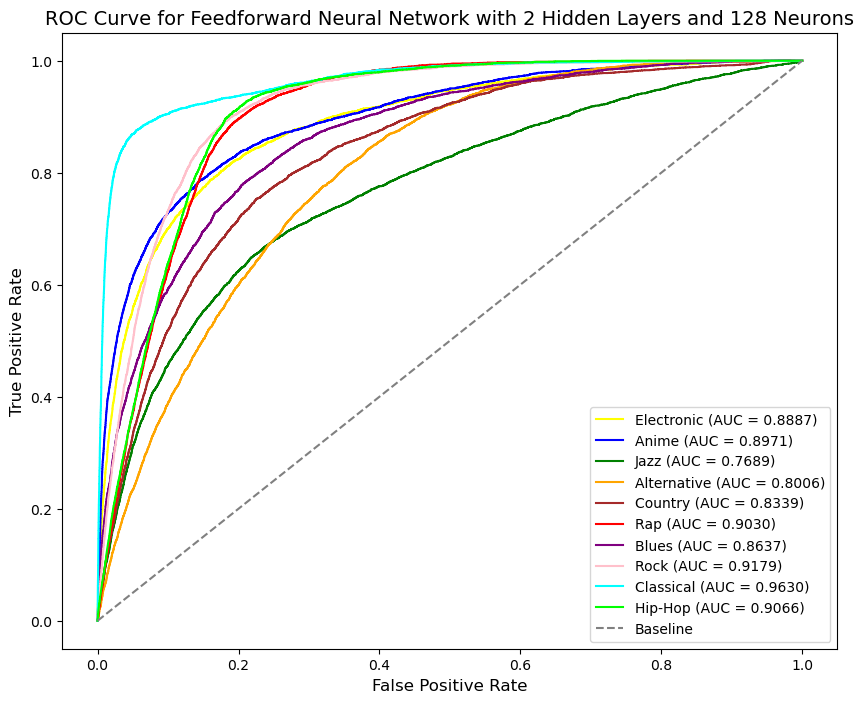

Average AUC Score for FFNN with 2 Hidden Layers and 128 Neurons: 0.8743


In [370]:
# Define the Feedforward Neural Network (FFNN) class with 2 hidden layers
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Parameters
input_dim = X_train_lda.shape[1]  # Number of LDA components
hidden_dim = 128  # Number of units in each hidden layer
output_dim = 10  # Number of genres

X_train_tensor = torch.tensor(X_train_lda, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)  

model = FFNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100  
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    y_prob = model(X_train_tensor).numpy()

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)

plt.figure(figsize=(10, 8))

auc_scores = []
for genre, colour in colours.items():
    class_id = genre_mapping[genre]  
    auc_score = roc_auc_score(y_train_bin[:, class_id-1], y_prob[:, class_id-1])  
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train_bin[:, class_id-1], y_prob[:, class_id-1])  
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Feedforward Neural Network with 2 Hidden Layers and 128 Neurons', fontsize=14)
plt.legend(loc='lower right')
plt.show()

average_auc_nn_2_layers_128 = np.mean(auc_scores)
print(f"Average AUC Score for FFNN with 2 Hidden Layers and 128 Neurons: {average_auc_nn_2_layers_128:.4f}")

Epoch [10/100], Loss: 2.2953
Epoch [20/100], Loss: 2.2599
Epoch [30/100], Loss: 2.2177
Epoch [40/100], Loss: 2.1632
Epoch [50/100], Loss: 2.1200
Epoch [60/100], Loss: 2.0763
Epoch [70/100], Loss: 2.0421
Epoch [80/100], Loss: 2.0136
Epoch [90/100], Loss: 1.9937
Epoch [100/100], Loss: 1.9800


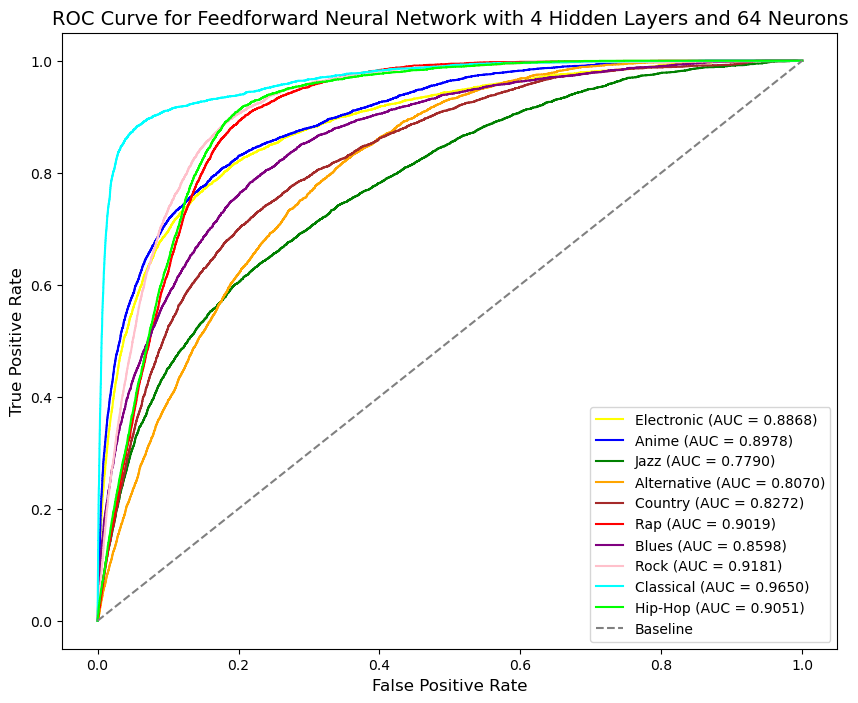

Average AUC Score for FFNN with 4 Hidden Layers and 64 Neurons: 0.8748


In [371]:
# Define the Feedforward Neural Network (FFNN) class with 4 hidden layers
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)  
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)  
        self.fc5 = nn.Linear(hidden_dim, output_dim)  
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.softmax(self.fc5(x))
        return x

# Parameters
input_dim = X_train_lda.shape[1]  # Number of LDA components
hidden_dim = 64  # Number of units in each hidden layer
output_dim = 10  # Number of genres

X_train_tensor = torch.tensor(X_train_lda, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)  

model = FFNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100  
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    y_prob = model(X_train_tensor).numpy()

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)

plt.figure(figsize=(10, 8))

auc_scores = []
for genre, colour in colours.items():
    class_id = genre_mapping[genre]  
    auc_score = roc_auc_score(y_train_bin[:, class_id-1], y_prob[:, class_id-1])  
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train_bin[:, class_id-1], y_prob[:, class_id-1]) 
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Feedforward Neural Network with 4 Hidden Layers and 64 Neurons', fontsize=14)
plt.legend(loc='lower right')
plt.show()

average_auc_nn_4_layers_64 = np.mean(auc_scores)
print(f"Average AUC Score for FFNN with 4 Hidden Layers and 64 Neurons: {average_auc_nn_4_layers_64:.4f}")

Epoch [10/100], Loss: 2.2777
Epoch [20/100], Loss: 2.1632
Epoch [30/100], Loss: 2.0833
Epoch [40/100], Loss: 2.0260
Epoch [50/100], Loss: 1.9943
Epoch [60/100], Loss: 1.9799
Epoch [70/100], Loss: 1.9693
Epoch [80/100], Loss: 1.9633
Epoch [90/100], Loss: 1.9591
Epoch [100/100], Loss: 1.9560


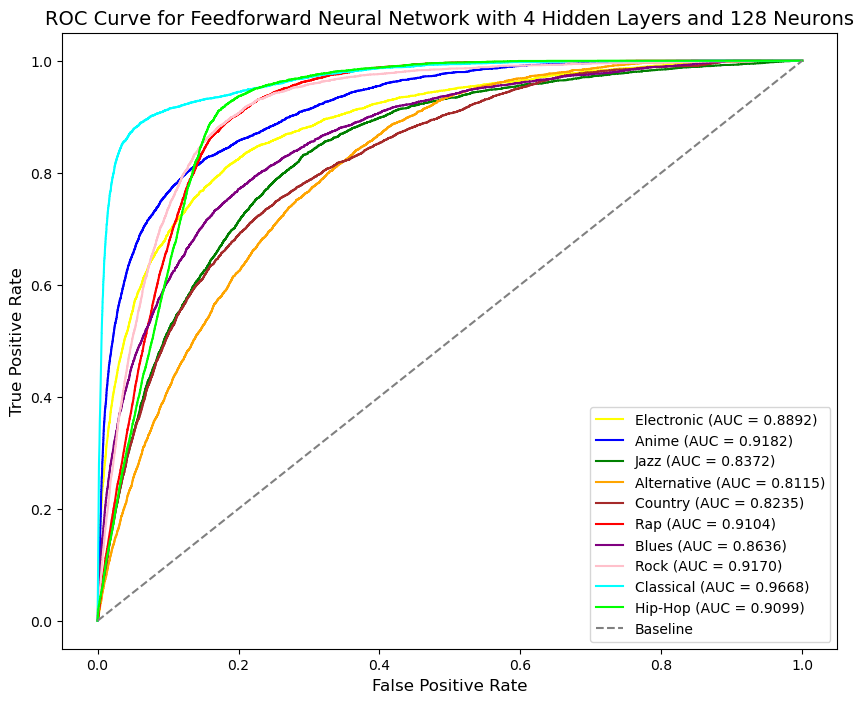

Average AUC Score for FFNN with 4 Hidden Layers and 128 Neurons: 0.8847


In [372]:
# Define the Feedforward Neural Network (FFNN) class with 4 hidden layers
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)  
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)  
        self.fc5 = nn.Linear(hidden_dim, output_dim)  
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.softmax(self.fc5(x))
        return x

# Parameters
input_dim = X_train_lda.shape[1]  # Number of LDA components
hidden_dim = 128  # Number of units in each hidden layer
output_dim = 10  # Number of genres

X_train_tensor = torch.tensor(X_train_lda, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long)  

model = FFNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100  
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    y_prob = model(X_train_tensor).numpy()

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)

plt.figure(figsize=(10, 8))

auc_scores = []
for genre, colour in colours.items():
    class_id = genre_mapping[genre]  
    auc_score = roc_auc_score(y_train_bin[:, class_id-1], y_prob[:, class_id-1])  
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train_bin[:, class_id-1], y_prob[:, class_id-1])  
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Feedforward Neural Network with 4 Hidden Layers and 128 Neurons', fontsize=14)
plt.legend(loc='lower right')
plt.show()

average_auc_nn_4_layers_128 = np.mean(auc_scores)
print(f"Average AUC Score for FFNN with 4 Hidden Layers and 128 Neurons: {average_auc_nn_4_layers_128:.4f}")

## Random Forest

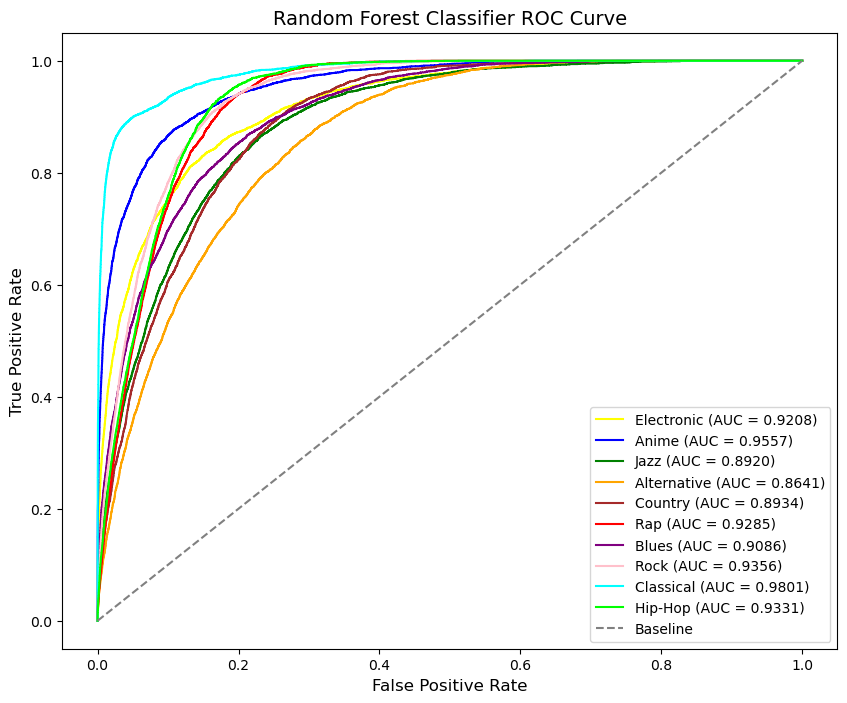

Average AUC Score for Random Forest: 0.9212


In [373]:
from sklearn.ensemble import RandomForestClassifier

# Initialise RandomForestClassifier 
rf_model = RandomForestClassifier(
    n_estimators=100,   # 100 trees
    max_depth=10,       # Limit the depth of each tree to avoid overfitting
    min_samples_split=5,  
    min_samples_leaf=2,   
    random_state=15598248
)

# Fit the model on LDA-transformed data
rf_model.fit(X_train_lda, y_train)

y_prob = rf_model.predict_proba(X_train_lda)

plt.figure(figsize=(10, 8))

auc_scores = []

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)

for genre, colour in colours.items():
    class_id = genre_mapping[genre]  
    auc_score = roc_auc_score(y_train_bin[:, class_id-1], y_prob[:, class_id-1])
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_train_bin[:, class_id-1], y_prob[:, class_id-1]) 
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_score:.4f})', color=colour)  

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline")

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest Classifier ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.show()

average_auc_rf = np.mean(auc_scores)
print(f"Average AUC Score for Random Forest: {average_auc_rf:.4f}")

## Average AUC Scores

In [376]:
models = {'SVM': average_auc_svc, 'Adaboost': average_auc_adaboost, 'XGBoost': average_auc_xgb, "FFNN with 2 Hidden Layers and 64 Neurons": average_auc_nn_2_layers_64,
         "FFNN with 2 Hidden Layers and 128 Neurons": average_auc_nn_2_layers_128, "FFNN with 4 Hidden Layers and 64 Neurons": average_auc_nn_4_layers_64,
         "FFNN with 4 Hidden Layers and 128 Neurons": average_auc_nn_4_layers_128, "Random Forest": average_auc_rf}

print('Average AUC Scores')
print()
for model, auc_score in models.items():
    print(f"{model}: {auc_score:.4f}")

Average AUC Scores

SVM: 0.8110
Adaboost: 0.8708
XGBoost: 0.9458
FFNN with 2 Hidden Layers and 64 Neurons: 0.8696
FFNN with 2 Hidden Layers and 128 Neurons: 0.8743
FFNN with 4 Hidden Layers and 64 Neurons: 0.8748
FFNN with 4 Hidden Layers and 128 Neurons: 0.8847
Random Forest: 0.9212
